In [5]:
import os
import numpy as np 
import matplotlib.pyplot as plt
import datetime
from astroML.stats import median_sigmaG
from scipy.stats import binned_statistic
from scipy.optimize import curve_fit
import CRTS_paper_modules as mod
reload(mod)


plot_data = {}

obj = 'qso'
Min = 18.5
Max = 19
fc = 1.0
plot_data[obj] = {}
outDir = os.path.join(os.getcwd()[:-4],'data_products/'+'Fig_2_data', 
                      datetime.datetime.now().strftime('%Y-%m-%d')+ '/')
fname = outDir+ 'r_cut_'+str(Min)+'-'+str(Max)+'_'+obj+'_fc-'+str(fc)+'.txt'
print 'Reading from', fname

colnames = open(fname,'r').read().splitlines()[0][1:].split()
d = np.genfromtxt(fname, dtype=float)

for label, column in zip(colnames, d.T):
    plot_data[obj][label] = column


Reading from /local/tmp/suberlak/CRTS_PROJECT/data_products/Fig_2_data/2016-06-03/r_cut_18.5-19_qso_fc-1.0.txt


In [7]:
plot_data['qso'].keys()

['sigmaApprox',
 'muFull',
 'muApprox',
 'binCount',
 'sigmaG',
 'sigmaFull',
 'stdev',
 'meanTau']

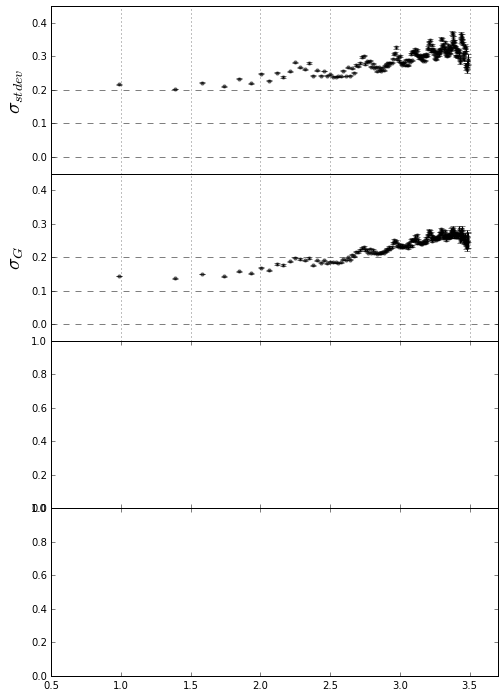

In [9]:
%matplotlib inline
# set all plot parameters
lh_w   = 1.0  # horizontal line thickness 
lh_st  = '--' # horizontal line style 
lh_al  = 0.5  # horizontal line alpha parameter 

# dot size 
p_size = 10
p_al   = 0.5 

# y limits for sigma, sigma_G, SF panels 
y_top  = 0.45
y_bott = -0.05

# y limits for mu approx 
y_mu_top = 0.1
y_mu_bott = -0.1

# x limits for ALL PANELS 
x_left = 0.5
x_right = 3.7

# colors for quasars, blue and red stars 
colors= {}
colors['qso'] = 'black'
colors['starsB'] = 'blue'
colors['starsR']   = 'red'

fig,ax = plt.subplots(4,1, figsize=(8,12), sharex=True)
fig.subplots_adjust(hspace=0)

# Panel 1 
for obj in plot_data.keys() : 
    ax[0].scatter(np.log10(plot_data[obj]['meanTau']), plot_data[obj]['stdev'], s=p_size, 
                    alpha=p_al, c = colors[obj])
    errStdev = plot_data[obj]['stdev'] / np.sqrt(2.0*(plot_data[obj]['binCount'] - 1.0))
    ax[0].errorbar(np.log10(plot_data[obj]['meanTau']), plot_data[obj]['stdev'],errStdev, 
                   linestyle='None', c = colors[obj]  )

ax[0].set_ylabel(r'$\sigma_{stdev}$',fontsize=20)  
ax[0].tick_params( axis='x', which='both',  bottom='off', 
                top='off', labelbottom='off') 
ax[0].set_ylim(bottom=y_bott, top=y_top)
ax[0].set_xlim(left=x_left, right=x_right)
ax[0].set_yticks([0,0.1,0.2,0.3,0.4])
ax[0].set_yticklabels(['0.0','0.1', '0.2', '0.3', '0.4'])
ax[0].axhline(y=0.0, color='black', lw=lh_w, ls=lh_st,alpha=lh_al)
ax[0].axhline(y=0.1, color='black', lw=lh_w, ls=lh_st,alpha=lh_al)
ax[0].axhline(y=0.2, color='black', lw=lh_w, ls=lh_st,alpha=lh_al)
ax[0].grid(axis='x')



# Panel 2
for obj in plot_data.keys() : 
    ax[1].scatter(np.log10(plot_data[obj]['meanTau']), plot_data[obj]['sigmaG'], s=p_size, 
                    alpha=p_al, c = colors[obj])
    errSigmaG = plot_data[obj]['sigmaG']* 1.06 / np.sqrt(plot_data[obj]['binCount'])
    ax[1].errorbar(np.log10(plot_data[obj]['meanTau']), plot_data[obj]['sigmaG'],errSigmaG, 
                   linestyle='None', c = colors[obj] )


ax[1].set_ylabel(r'$\sigma_{G}$',fontsize=20)  
ax[1].tick_params( axis='x', which='both',  bottom='off', 
                top='off', labelbottom='off') 
ax[1].set_ylim(bottom=y_bott, top=y_top)
ax[1].set_xlim(left=x_left, right=x_right)
ax[1].set_yticks([0,0.1,0.2,0.3,0.4])
ax[1].set_yticklabels(['0.0','0.1', '0.2', '0.3', '0.4'])
ax[1].axhline(y=0.0, color='black', lw=lh_w, ls=lh_st,alpha=lh_al)
ax[1].axhline(y=0.1, color='black', lw=lh_w, ls=lh_st,alpha=lh_al)
ax[1].axhline(y=0.2, color='black', lw=lh_w, ls=lh_st,alpha=lh_al)
ax[1].grid(axis='x')




    # mu_bins['approx_err'] = bin_stdev / np.sqrt(bin_count)


# Panel 3
 
def model_sf(t, sf_inf=0.25, tau = 1.0):
    br = 1.0-np.exp(-t/tau)
    sf = sf_inf * np.power(br,0.5)
    return sf

# Calculate the model DRW fit for QSO
obj = 'qso'
xdata = plot_data[obj]['mean_tau']
sf = plot_data[obj]['SF']
popt, pcov = curve_fit(model_sf, xdata, sf)
y = model_sf(xdata, sf_inf=popt[0], tau = popt[1]) # tau 1 year in days 

# Fold-in the error to the model SF , plot 
# both folded and not-folded version \
err_sig = plot_data[obj]['SF_err']
y_fold = np.sqrt((y ** 2.0)+ (err_sig ** 2.0) )
ax[2].plot(np.log10(xdata), y_fold , lw=3, c = 'green', ls='--')
ax[2].plot(np.log10(xdata), y , lw=3, c = 'orange', ls='--')

text = r'$ \mathrm{Model:}\ \tau=%.3f \,\mathrm{days} , \ SF_{\infty}=%.3f \,\mathrm{mag}$'%(popt[1],popt[0])
ax[2].text(x=0.75, y=0.3,s = text )

    
for obj in plot_data.keys() : 
    ax[2].scatter(np.log10(plot_data[obj]['mean_tau']), plot_data[obj]['SF'], s=p_size, 
                    alpha=p_al, c = colors[obj])
    ax[2].errorbar(np.log10(plot_data[obj]['mean_tau']), plot_data[obj]['SF'],plot_data[obj]['SF_err'], 
                   linestyle='None', c = colors[obj]  )

ax[2].set_ylim(bottom=y_bott, top=y_top)
ax[2].set_xlim(left=x_left, right=x_right)
ax[2].set_ylabel(r'$SF $',fontsize=20)
ax[2].tick_params( axis='x', which='both',  bottom='off', 
                top='off', labelbottom='off')
ax[2].grid(axis='x')
ax[2].set_yticks([0,0.1,0.2,0.3,0.4])
ax[2].set_yticklabels(['0.0','0.1', '0.2', '0.3', '0.4'])
ax[2].axhline(y=0.0, color='black', lw=lh_w, ls=lh_st,alpha=lh_al)    
ax[2].axhline(y=0.1, color='black', lw=lh_w, ls=lh_st,alpha=lh_al)
ax[2].axhline(y=0.2, color='black', lw=lh_w, ls=lh_st,alpha=lh_al) 

